* **1 导入检查数据**
    * 1.1 导入数据
    * 1.2 异常值检测
    * 1.3 训练集与测试集合并
    * 1.4 检查null值和缺失值  
* **2 特征分析** 
    * 2.1 数值型
    * 2.2 分类型值
* **3 填充缺失值** 
    * 3.1 Age 
* **4 特征工程** 
    * 4.1 名字和称谓  
    * 4.2 家庭人数
    * 4.3 船舱等级
    * 4.4 船票
* **5 建模** 
    * 5.1 简单的模型
    * 5.2 叠加模型 
    * 5.3 预测

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from collections import Counter 

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
                                GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, cross_val_score, \
                                    cross_val_score, StratifiedKFold,\
                                    learning_curve

## 1 加载并检查数据
### 1.1 加载数据

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
IDtest = test['PassengerId']

### 1.2 异常值检测

### 1.3 合并训练和测试集

In [3]:
train_len = len(train)
df = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df.head(3)

C:\Users\Voyager\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


### 1.4 检查null值和缺失值 

In [4]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## 2.特征分析
### 2.1 数值型

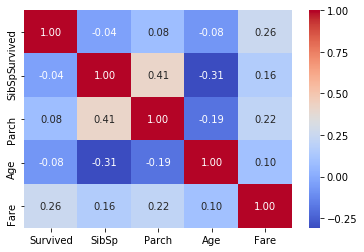

In [7]:
g = sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# 似乎只有Fare 与生存率相关

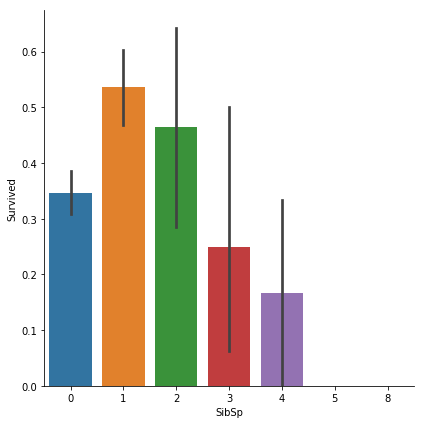

In [8]:
# 探索生存 与 sibsp的关系 
sns.factorplot(x='SibSp', y='Survived', data=train, kind='bar', size=6)

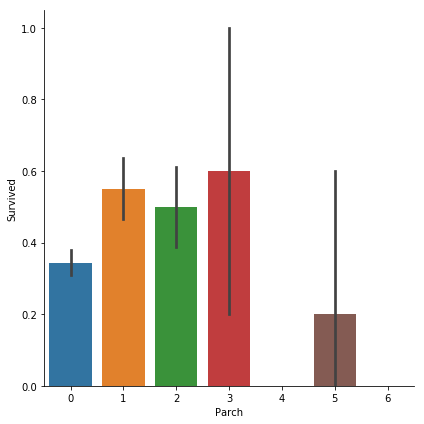

In [9]:
# Survived 与 Parch 的关系 
sns.factorplot(x='Parch', y='Survived', data=train, kind='bar', size=6)

* 家庭人数少的生存机会较大

C:\Users\Voyager\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Voyager\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


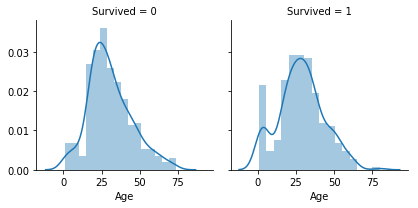

In [10]:
# Age 与 Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, 'Age')

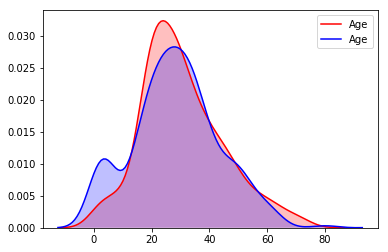

In [11]:
g = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())], color='Red', shade=True)
g = sns.kdeplot(train['Age'][(train['Survived']==1) & (train['Age'].notnull())], color='Blue', shade=True)

In [12]:
# Fare 
# df[df['Fare'].isnull()]
df['Fare'].fillna(df['Fare'].median(), inplace=True)

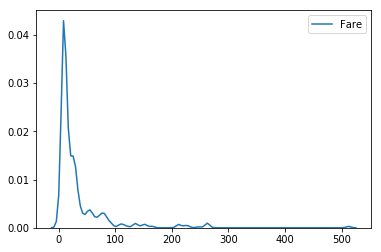

In [13]:
# Age
g = sns.kdeplot(df['Fare'])

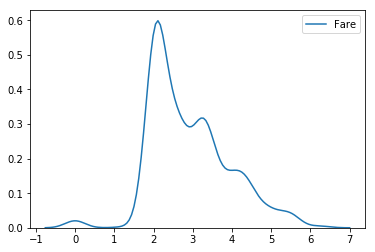

In [14]:
df['Fare'] = df['Fare'].map(lambda i : np.log(i) if i > 1 else 0)
sns.kdeplot(df['Fare'])

### 2.2 分类值

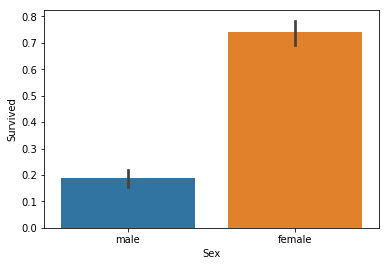

In [15]:
# sex
sns.barplot(x='Sex', y='Survived', data=train)

In [16]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

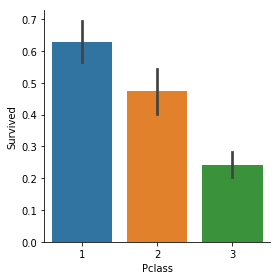

In [17]:
# Pclass 
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar')

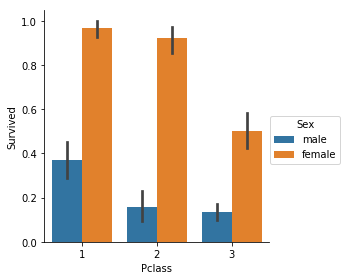

In [18]:
# Pclass and Sex 
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar')

In [19]:
# Embarked 
df['Embarked'] = df['Embarked'].fillna('S')

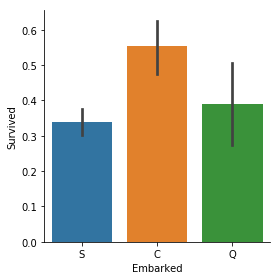

In [20]:
# Embarked 
sns.factorplot(x='Embarked', y='Survived', data=df, kind='bar')

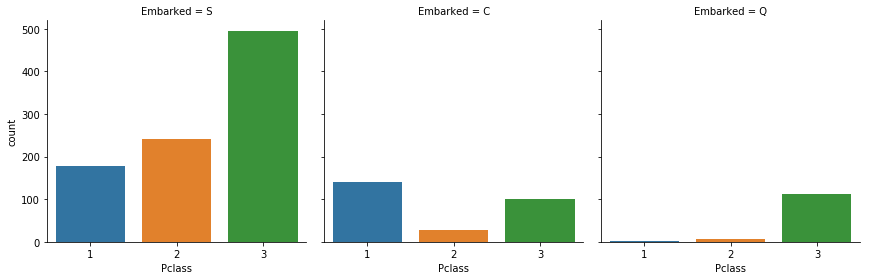

In [21]:
# Embarked , Pclass 
sns.factorplot('Pclass', col='Embarked', data=df, kind='count')

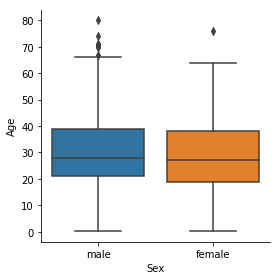

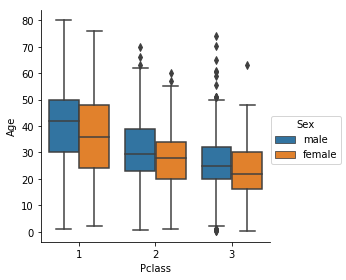

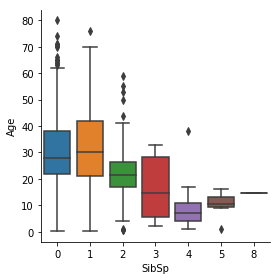

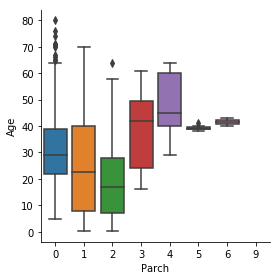

In [22]:
# Age | Sex, Parch, Pclass, SibSp 
sns.factorplot(y='Age', x='Sex', data=df, kind='box')
sns.factorplot(y='Age', x='Pclass', hue='Sex', data=df, kind='box')
sns.factorplot(y='Age', x='SibSp', data=df, kind='box')
sns.factorplot(y='Age', x='Parch', data=df, kind='box')

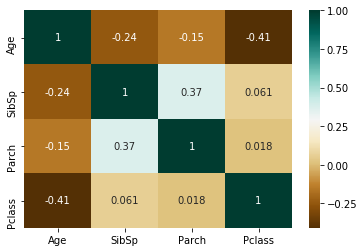

In [23]:
sns.heatmap(df[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(), cmap='BrBG', annot=True)

In [24]:
# 填充年龄缺失值 


In [25]:
df_title = [i.split(',')[1].split('.')[0].strip() for i in df['Name']]
df['Title'] = df_title

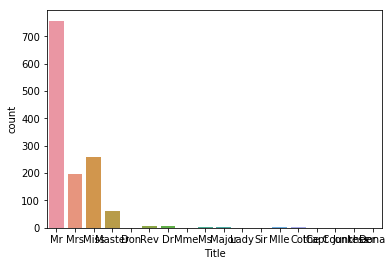

In [26]:
sns.countplot(x='Title', data=df)

In [27]:
df.groupby('Title')['Title'].count()

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: Title, dtype: int64

In [28]:
df.replace(['Capt','Major','Col','Don','Dona','Dr','Jonkheer','Mlle','Mme','Ms','Rev', 'the Countess'], 'Rare', inplace=True)
df.replace(['Sir'], 'Mr', inplace=True)
df.replace(['Lady'], 'Miss', inplace=True)

In [29]:
df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df['Cabin']])

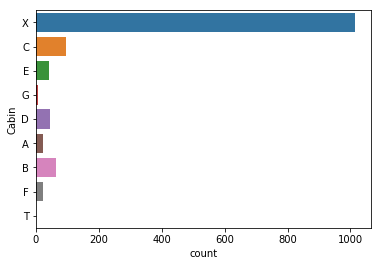

In [30]:
sns.countplot(y='Cabin', data=df)

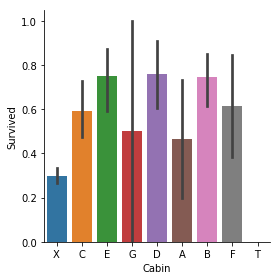

In [31]:
sns.factorplot(y='Survived', x='Cabin', data=df, kind='bar')

In [32]:
df['Ticket'] = pd.Series([t.replace('/', '').replace('.','').split(' ')[0] if len(t.split(' '))-1 else 'X' for t in df.Ticket])

In [33]:
df['Fsize'] = df['SibSp'] + df['Parch']

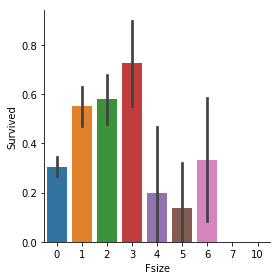

In [34]:
sns.factorplot(x='Fsize', y='Survived', data=df, kind='bar')

In [35]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [36]:
index_Nan_age = list(df['Age'][df['Age'].isnull()].index)
for i in index_Nan_age:
    age_med = df['Age'].median()
    age_pred = df['Age'][((df['SibSp']==df.iloc[i]['SibSp']) & \
                            (df['Parch']==df.iloc[i]['Parch'])&\
                            (df['Pclass']==df.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred):
        df['Age'].iloc[i] = age_pred 
    else:
        df['Age'].iloc[i] = age_med

C:\Users\Voyager\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
df.info()
print(df.Cabin.unique())
print(df.Embarked.unique())
print(df.Ticket.unique())
print(df.Title.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Fsize          1309 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 143.2+ KB
['X' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q']
['A5' 'PC' 'STONO2' 'X' 'PP' 'CA' 'SCParis' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'STONO' 'C' 'SCPARIS' 'SOP' 'Fa' 'FCC' 'SWPP' 'SCOW'
 'PPP' 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO2' 'CASOTON' 'SCA3' 'STONOQ'
 'AQ4' 'A' 'LP' 'AQ3']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [38]:
df = pd.get_dummies(df, columns=['Cabin', 'Embarked','Ticket', 'Title'])

In [39]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [40]:
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Fsize,Cabin_A,Cabin_B,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,1.981001,0,3,1,1,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,4.266662,0,1,0,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,2.070022,0,3,0,0,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,35.0,3.972177,0,1,0,1,1.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,35.0,2.085672,0,3,1,0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 建模

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import model_selection

In [42]:
random_state = 2
kfold = StratifiedKFold(n_splits=10)
classifiers = []
classifiers.append(AdaBoostClassifier(DesisionTreeClassifier(random_state=random_state), random_state=random_state, learn_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train, scoring='accuracy', cv=kfold, n_jobs=4))

NameError: name 'DesisionTreeClassifier' is not defined

In [ ]:
for cv_result in cv_results:
    print(cv_result.mean())

In [ ]:
# for i in range(2,10):
#     for j in range(2, 10):
rf = RandomForestClassifier(random_state=2, n_estimators=500, min_samples_split=7, min_samples_leaf=3)
kf = model_selection.KFold(n_splits=5, shuffle=False, random_state=2)
scores = model_selection.cross_val_score(rf, X_train, Y_train, cv=kf)
#     print(scores)
print(i, j, scores.mean())

In [ ]:
rf = RandomForestClassifier()
rf_params = {
    'max_features':[1,3,10],
    'min_samples_split':[2,3,5,7,10],
    'min_samples_leaf':[1,3,5,7,10],
    'n_estimators': [100, 300],
    'criterion': ['gini']}
gsrf = GridSearchCV(rf, param_grid=rf_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
gsrf.fit(X_train, Y_train)
gsrf.best_estimator_

In [ ]:
gsrf.best_score_

In [ ]:
test_survived = gsrf.predict(test)

In [ ]:
submission = pd.read_csv('submission.csv')
submission['Survived'] = test_survived.astype(int)

In [ ]:
submission.to_csv('submission_08_21.csv')